<a href="https://colab.research.google.com/github/isaacchunn/SC1015_MiniPrj_Airbnb/blob/main/AirbnbAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset : Airbnb Singapore Dataset from InsideAirbnb
#### Question : If we were an AirBnb host, how can we maximise our profit?


Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/


# Contents
  1. Dataset
  2. Univariate EDA
  3. Bivariate EDA
  4. Multivariate EDA
  5. Machine Learning
  6. Regression
    *   Linear Regression


---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [182]:
# Isaac Chun Jun Heng U2221389B
# J'sen Ong Jia Xuan  U2220457J
# Tang Teck Meng U2221809C

In [183]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #We only need pyplot
sb.set() #Set the default Seaborn style for graphics

### Additional Dependencies

In [184]:
!pip install geopandas
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Additional Libraries

Import additional libraries

> Wordcloud : Library to create tag clouds in Python  
> Folium : Plot a map visualization in Python  
> Geopandas : Handle geojson data to generate chloropelth maps
> sklearn : Conduct linear regression analysis

In [243]:
from IPython import display
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import folium
import geopandas

### General Utility Functions

In [186]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

In [187]:
def removeOutliers(df, colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3-q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  result = df.loc[(df[colName] >= low) & (df[colName] <= high)]
  return result

In [188]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

### Mount Google Drive (unused, uncomment if need add anything from google drive.)

In [189]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

#What is Airbnb?

Airbnb, Inc. is an American San Francisco-based company operating an online marketplace for short-term homestays and experiences. The company acts as a broker and charges a commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia.




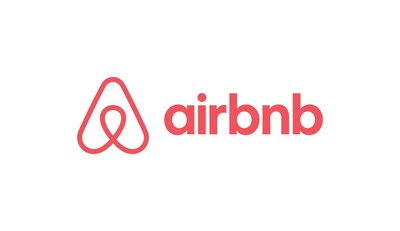

In [190]:
display.Image("https://mma.prnewswire.com/media/1121685/Airbnb_Logo.jpg")

---

>## Hypothesis  

1. The number of amenities a listing provides will affect its price, the more the amenities, the higher the listing price
2. Variables related to host's review will have positive correlation to listing's price

---

>## Import the Dataset  

We have imported the cleaned dataset based on our EDA done in the other files.

In [191]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/listings_cleaned.csv"
airDF = pd.read_csv(url)
airDF.head()

,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,103.95887,Private room in villa,...,20,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,103.95958,Private room in home,...,24,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,103.96100,Private room in home,...,47,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,103.80814,Private room in rental unit,...,22,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,103.81144,Private room in rental unit,...,14,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


In [192]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   description                   2968 non-null   object 
 1   neighborhood_overview         1968 non-null   object 
 2   host_response_time            2405 non-null   object 
 3   host_response_rate            2405 non-null   object 
 4   host_acceptance_rate          2284 non-null   object 
 5   neighbourhood_cleansed        3018 non-null   object 
 6   neighbourhood_group_cleansed  3018 non-null   object 
 7   latitude                      3018 non-null   float64
 8   longitude                     3018 non-null   float64
 9   property_type                 3018 non-null   object 
 10  accommodates                  3018 non-null   int64  
 11  amenities                     3018 non-null   object 
 12  price                         3018 non-null   object 
 13  min

In [193]:
print(airDF.dtypes)

description                      object
neighborhood_overview            object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
accommodates                      int64
amenities                        object
price                            object
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                          object
instant_bookable                 object


---

## Potential Variables  
During our EDA, we have cleaned the dataset and identified several variables that might affect the price. It is listed as follows:

1. **host_response_time** : The average response time of the host to messages.
2. **neighbourhood_cleansed** : The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
3. **neighbourhood_group_cleansed** : The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
4. **property_type** : Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field
5. **accommodates** : The maximum capacity of the listing
6. **amenities** : The amenities in this hotel room

Other variables for further analysis: 
1. **description** : The description of the Airbnb listing.
2. **neighbourhood_overview** : A brief overview of the neighborhood where the Airbnb listing is located.
3. **latitude** : the latitude of this property
4. **longitude** : the longitude of this property

---

>## Cleaning our DataFrame/Dataset

1. Drop properties with N/A or 0% acceptance rate as these properties do not get stayed at by visitors.

In [194]:
#Drop all the properties that has no host acceptance rate then drop
airDF = airDF.dropna(subset=["host_acceptance_rate"])
#Then remove all the 0% acceptance rate
airDF = airDF[airDF["host_acceptance_rate"] != 0]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF

,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.345370,103.958870,Private room in villa,...,20,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.347540,103.959580,Private room in home,...,24,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.345310,103.961000,Private room in home,...,47,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.290150,103.808140,Private room in rental unit,...,22,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.288360,103.811440,Private room in rental unit,...,14,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,This mixed dormitory is suitable for male and ...,NaN,within an hour,97%,97%,Singapore River,Central Region,1.287416,103.847270,Shared room in hostel,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S0301,t
2280,This mixed dormitory is suitable for male and ...,NaN,within an hour,97%,97%,Singapore River,Central Region,1.287416,103.847270,Shared room in guesthouse,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S0301,t
2281,This private room is suitable for male and fem...,NaN,within an hour,97%,97%,Singapore River,Central Region,1.287416,103.847270,Private room in hostel,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S0301,t
2282,INFINITY POOL<br />Imagine soaking in the worl...,NaN,within an hour,100%,100%,Downtown Core,Central Region,1.281098,103.859833,Room in hotel,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S7292,f


2. Clean the price column using code as it has  "$", "," and ".".

In [195]:
airDF["price"]

0       $46,437.00 
1           $81.00 
2           $81.00 
3           $52.00 
4           $49.00 
           ...     
2279        $45.00 
2280        $45.00 
2281       $186.00 
2282       $797.00 
2283       $434.00 
Name: price, Length: 2284, dtype: object

In [196]:
breaks = [",", "$"]
for i in range(len(airDF["price"])):
    s = airDF.loc[:,("price")][i]
    for x in breaks:
        s = s.replace(x,"")
    s = "".join(s.split(".")[:-1])
    airDF.loc[:,("price")][i] = int(s)
airDF["price"]

<ipython-input-196-c2d246cacc01>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF.loc[:,("price")][i] = int(s)


0       46437
1          81
2          81
3          52
4          49
        ...  
2279       45
2280       45
2281      186
2282      797
2283      434
Name: price, Length: 2284, dtype: object

3. Convert the amenities column to a list, and add a new column with the number of amenities to be used for our prediction.

In [197]:
airDF["amenities"]

0       ["Cooking basics", "Refrigerator", "Kitchen", ...
1       ["Cooking basics", "Refrigerator", "Kitchen", ...
2       ["Cooking basics", "Heating", "Kitchen", "Hair...
3       ["Air conditioning", "Shampoo", "Smoke alarm",...
4       ["Air conditioning", "Shampoo", "Smoke alarm",...
                              ...                        
2279    ["Air conditioning", "Fire extinguisher", "Sec...
2280    ["Air conditioning", "Fire extinguisher", "Sec...
2281    ["Air conditioning", "Fire extinguisher", "Sec...
2282    ["First aid kit", "EV charger", "Heating", "Re...
2283    ["Air conditioning", "Fire extinguisher", "Fir...
Name: amenities, Length: 2284, dtype: object

In [198]:
#Add a new column of amenities
airDF["no_amenities"] = 0
#Replace all with the integer variant
count = 0
for x in airDF["amenities"]:   
    #Convert string into list
    x = x.replace('[',"")
    x = x.replace(']',"")
    l = list(x.split(","))
    airDF["amenities"][count] = l
    airDF["no_amenities"][count] = len(l)
    count += 1

airDF["no_amenities"]

<ipython-input-198-32ba2df68249>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = l
<ipython-input-198-32ba2df68249>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(l)


0       33
1       31
2       26
3       17
4       18
        ..
2279     8
2280     8
2281     8
2282    41
2283    15
Name: no_amenities, Length: 2284, dtype: int64

---

>## Splitting the dataset

In [199]:
#Split the dataset into train and test for prediction later on
train_data, test_data = train_test_split(airDF, test_size = 0.2, random_state = 100)

#Check the dimension and shape of our train and test datasets
print("Train Dataset : ")
print("Data type : ", type(train_data))
print("Data dims : ", train_data.shape)
print('-------------------------------------------------------')
print("Test Dataset : ")
print("Data type : ", type(test_data))
print("Data dims : ", test_data.shape)

Train Dataset : 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1827, 26)
-------------------------------------------------------
Test Dataset : 
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (457, 26)


---

>## Set up map for future visualisation

In [200]:
#Plot all first
lat_mean = airDF["latitude"].mean()
long_mean = airDF["longitude"].mean()
area_lat_long = pd.concat([airDF["latitude"],airDF["longitude"]], axis = 1)
area_lat_long = area_lat_long.values.tolist()

In [201]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/geodata.csv"
geo = pd.read_csv(url)
geo = geo.sort_values(by =["name"])
geo.reset_index(drop = True)
geo.head(n=5)

,name,latitude,longitude
0,ANG MO KIO,1.369115,103.845434
1,BEDOK,1.323604,103.927341
2,BISHAN,1.352585,103.835212
31,BOON LAY,1.314289,103.708969
3,BUKIT BATOK,1.359029,103.763680


In [202]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/sg.geojson"
geojson = geopandas.read_file(url)
geojson = geojson[['name','geometry']]
geojson.head(n=5)

,name,geometry
0,BISHAN,"POLYGON ((103.84924 1.36275, 103.84936 1.36268..."
1,BUKIT BATOK,"POLYGON ((103.76408 1.37001, 103.76444 1.36947..."
2,BUKIT MERAH,"POLYGON ((103.81740 1.29433, 103.81743 1.29431..."
3,BUKIT PANJANG,"POLYGON ((103.77445 1.39029, 103.77499 1.38607..."
4,BUKIT TIMAH,"POLYGON ((103.79766 1.34813, 103.79806 1.34779..."


In [203]:
mapDF = geojson.merge(geo, left_on = "name", right_on = "name", how = "outer")
mapDF = mapDF[~mapDF['geometry'].isna()]
mapDF.head(n=10)

,name,geometry,latitude,longitude
0,BISHAN,"POLYGON ((103.84924 1.36275, 103.84936 1.36268...",1.352585,103.835212
1,BUKIT BATOK,"POLYGON ((103.76408 1.37001, 103.76444 1.36947...",1.359029,103.763680
2,BUKIT MERAH,"POLYGON ((103.81740 1.29433, 103.81743 1.29431...",1.281905,103.823918
3,BUKIT PANJANG,"POLYGON ((103.77445 1.39029, 103.77499 1.38607...",1.377414,103.771950
4,BUKIT TIMAH,"POLYGON ((103.79766 1.34813, 103.79806 1.34779...",1.329411,103.802078
5,CENTRAL WATER CATCHMENT,"POLYGON ((103.80702 1.41126, 103.80754 1.40986...",1.355200,103.797200
6,CHANGI,"POLYGON ((103.98236 1.39356, 103.98242 1.39349...",1.344953,103.982597
7,CHANGI BAY,"MULTIPOLYGON (((104.02076 1.32566, 104.02139 1...",1.322244,104.027783
8,CHOA CHU KANG,"POLYGON ((103.74660 1.40541, 103.74691 1.40540...",1.383980,103.746961
9,CLEMENTI,"POLYGON ((103.75857 1.29929, 103.75831 1.29911...",1.316181,103.764938


In [204]:
#Create the map
map = folium.Map(
    #Center the map here at location
    location = [lat_mean, long_mean], zoom_start = 12
)
map

---

# 1. Univariate EDA

---
### 1. host_response_time
<b>host_response_time</b>: The average response time of the host to messages.

In [205]:
hostResponseDF = pd.DataFrame(airDF["host_response_time"]).copy()
hostResponseDF.head()

,host_response_time
0,within a few hours
1,within a few hours
2,within a few hours
3,within an hour
4,within an hour


In [206]:
hostResponseDF.describe()

,host_response_time
count,2187
unique,4
top,within an hour
freq,855


In [207]:
hostResponseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   host_response_time  2187 non-null   object
dtypes: object(1)
memory usage: 18.0+ KB


In [208]:
hostResponseDF.isna().value_counts()

host_response_time
False                 2187
True                    97
dtype: int64

In [209]:
hostResponseDF = hostResponseDF.dropna()
hostResponseDF.isnull().value_counts()

host_response_time
False                 2187
dtype: int64

In [210]:
hostResponseDF.head(15)

,host_response_time
0,within a few hours
1,within a few hours
2,within a few hours
3,within an hour
4,within an hour
5,within a few hours
6,within a few hours
7,within an hour
8,within an hour
9,within an hour


<Axes: xlabel='host_response_time', ylabel='Count'>

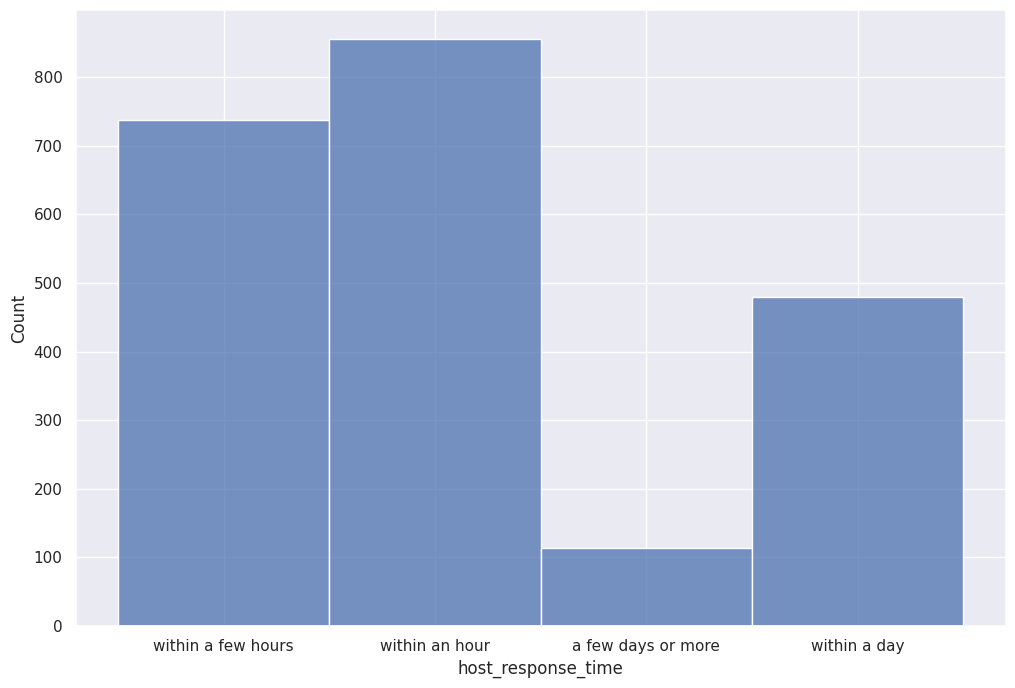

In [211]:
#Plot it against a histplot to see the results
f = plt.figure(figsize=(12,8))
sb.histplot(data = hostResponseDF, x = 'host_response_time')

In [212]:
#Calculate percentages of host for each bin
hostResponseDF.value_counts()

host_response_time
within an hour        855
within a few hours    738
within a day          480
a few days or more    114
dtype: int64

In [213]:
length = len(hostResponseDF)
#Print the percentages
print("Within an hour: ", round((855/length) * 100,2), "%", sep = "")
print("Within a few hours: ", round((738/length) * 100,2), "%", sep = "")
print("Within a day: ", round((480/length) * 100,2), "%", sep = "")
print("A few days or more: ", round((114/length) * 100,2), "%", sep = "")

Within an hour: 39.09%
Within a few hours: 33.74%
Within a day: 21.95%
A few days or more: 5.21%


#### INSIGHT: We can observe that majority of the hosts has a response time of within an hour, with 855 hosts replying within an hour. Generally, about 21.95% of hosts reply within a day.

---
### 2. neighbourhood_cleansed
<b>neighbourhood_group_cleansed</b>: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.

In [214]:
neighbourhoodDF = pd.DataFrame(airDF["neighbourhood_cleansed"])
neighbourhoodDF

,neighbourhood_cleansed
0,Tampines
1,Tampines
2,Tampines
3,Bukit Merah
4,Bukit Merah
...,...
2279,Singapore River
2280,Singapore River
2281,Singapore River
2282,Downtown Core


In [215]:
neighbourhoodDF.describe()

,neighbourhood_cleansed
count,2284
unique,38
top,Downtown Core
freq,288


<Axes: xlabel='neighbourhood_cleansed', ylabel='Count'>

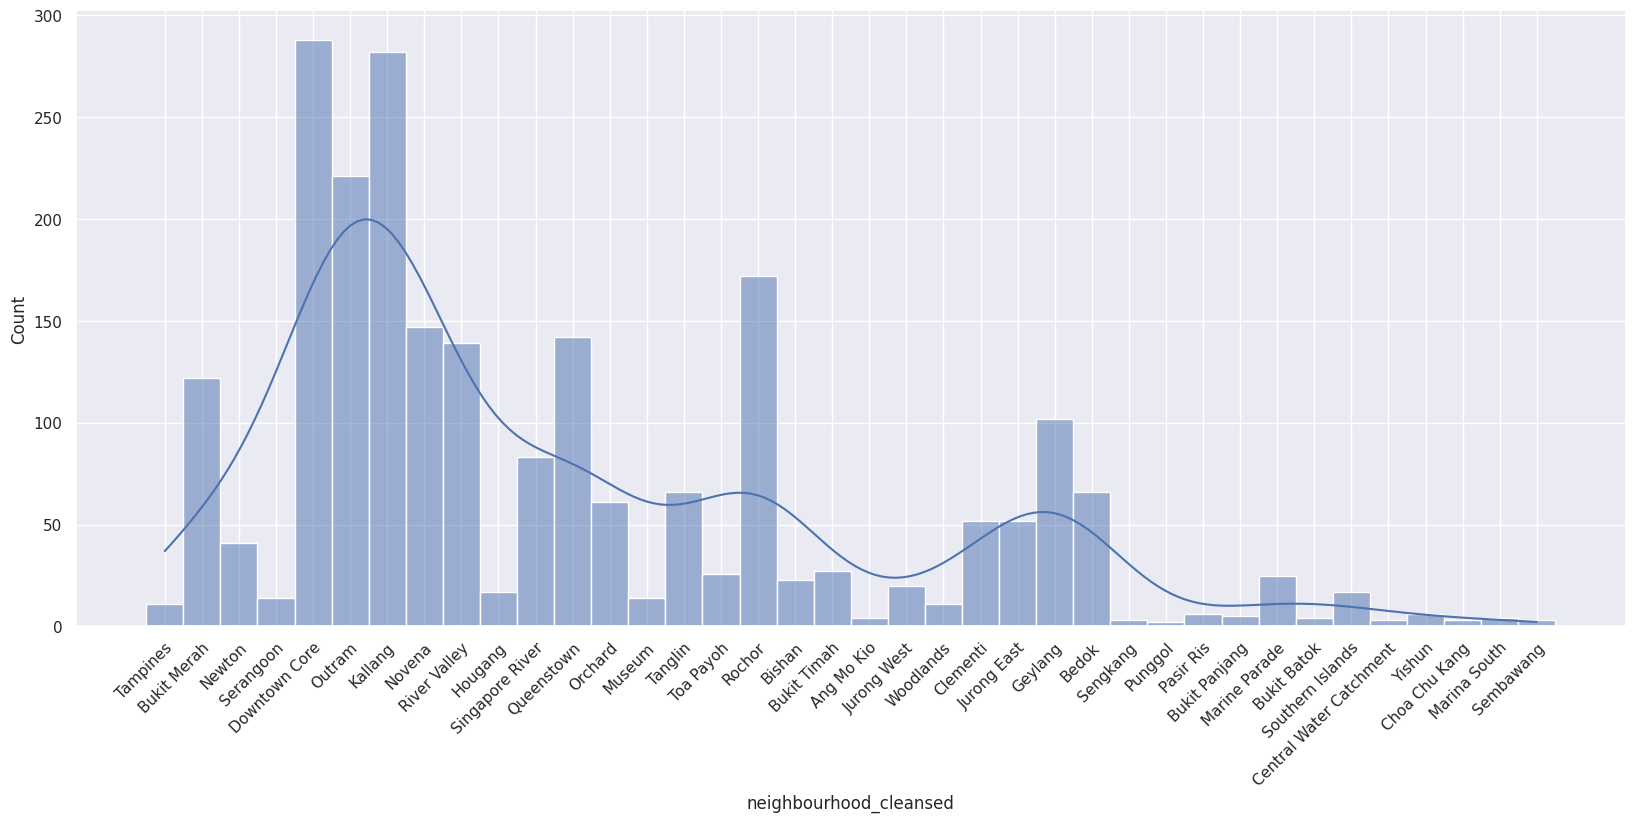

In [216]:
#Plot it against a histplot to see the results
f = plt.figure(figsize = (20,8))
plt.xticks(np.arange(0, len(neighbourhoodDF["neighbourhood_cleansed"].unique()), step=1))  # Set label locations.
plt.xticks(rotation =45, ha = "right", rotation_mode = "anchor")
sb.histplot(data = neighbourhoodDF["neighbourhood_cleansed"], kde = True)

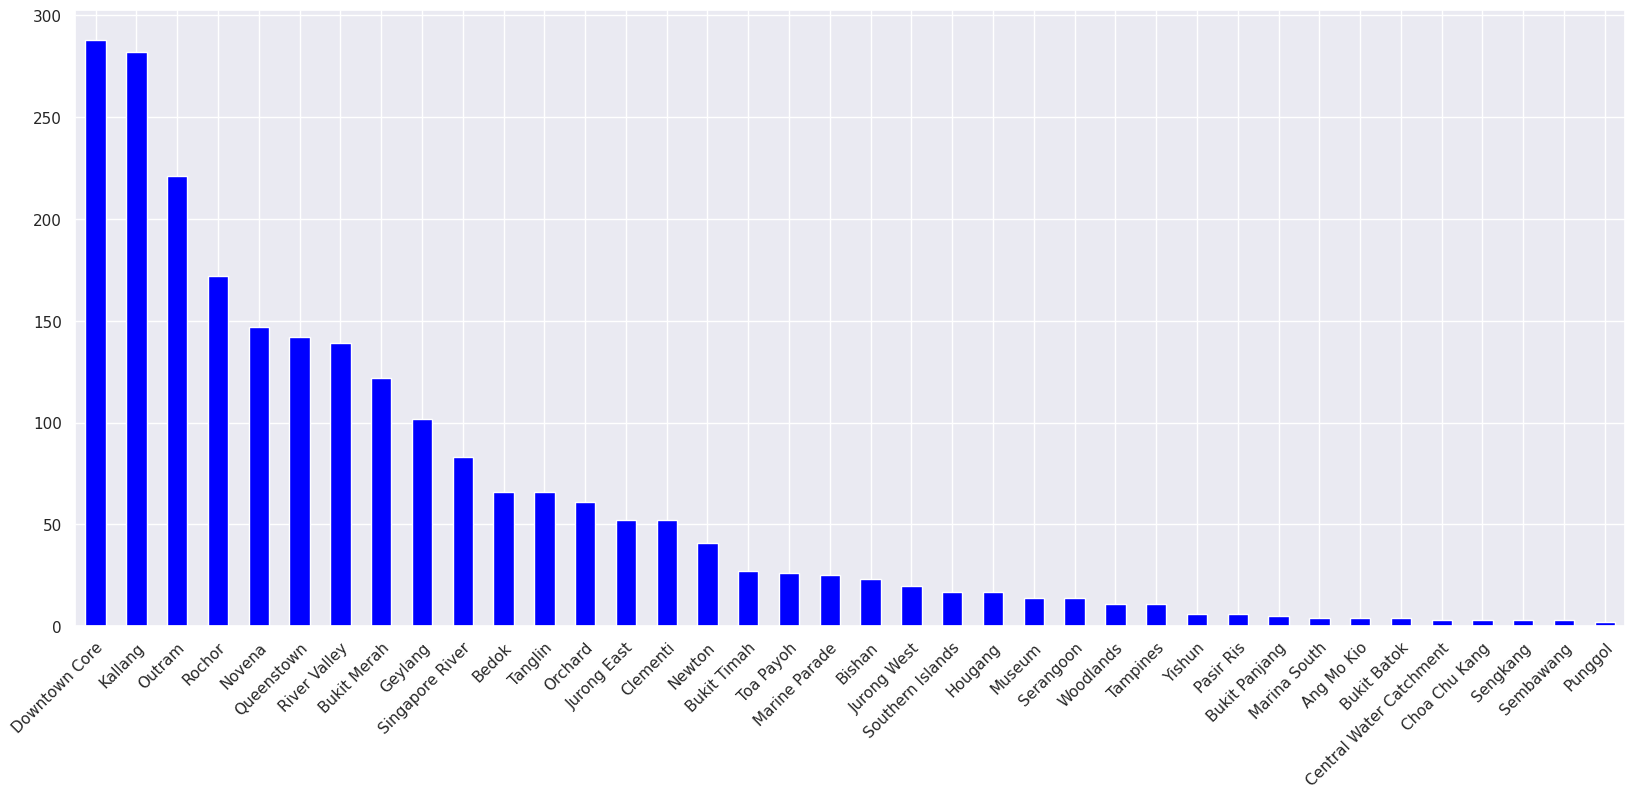

In [217]:
#Plot it against a different plot in ascending order to see the results
f = plt.figure(figsize = (20,8))

neighbourhoodDF["neighbourhood_cleansed"].value_counts().plot(kind='bar',color=['blue'])
plt.xticks(np.arange(0, len(neighbourhoodDF["neighbourhood_cleansed"].unique()), step=1))  # Set label locations.
plt.xticks(rotation =45, ha = "right", rotation_mode = "anchor")
plt.show()
#sb.histplot(data = neighbourhoodDF["neighbourhood_cleansed"])

#### We can see that **Downtown Core** has the highest amount of listings, let us plot a map to see it with colors for better visualization

In [218]:
#Calculate the percentages and store it into a series
percentages = {}
numbers = {}
#Store keys
for x in mapDF["name"]:
    percentages[x] = 0
    numbers[x] = 0
#Then update all the values
for x in neighbourhoodDF["neighbourhood_cleansed"]:
    percentages[x.upper()] += 1
    numbers[x.upper()] += 1
    
#Calculate percentages
for key, item in percentages.items():
    percentages[key] = round((item/len(neighbourhoodDF["neighbourhood_cleansed"])*100),3)

In [219]:
#Add our percentages into geo json
percentageMapDF = mapDF.copy()
#Set up new column
percentageMapDF["listingnumber"] = 0
percentageMapDF["percentage"] = 0

count = 0
#Add in according to name
for keys, value in percentages.items():
   percentageMapDF.loc[:,('percentage')][count] = value
   count += 1

count = 0
#Add in according to name
for keys, value in numbers.items():
   percentageMapDF.loc[:,('listingnumber')][count] = value
   count += 1

percentageMapDF.head(5)

<ipython-input-219-22ba4c4e811b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentageMapDF.loc[:,('percentage')][count] = value
<ipython-input-219-22ba4c4e811b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentageMapDF.loc[:,('listingnumber')][count] = value


,name,geometry,latitude,longitude,listingnumber,percentage
0,BISHAN,"POLYGON ((103.84924 1.36275, 103.84936 1.36268...",1.352585,103.835212,23,1.007
1,BUKIT BATOK,"POLYGON ((103.76408 1.37001, 103.76444 1.36947...",1.359029,103.763680,4,0.175
2,BUKIT MERAH,"POLYGON ((103.81740 1.29433, 103.81743 1.29431...",1.281905,103.823918,122,5.342
3,BUKIT PANJANG,"POLYGON ((103.77445 1.39029, 103.77499 1.38607...",1.377414,103.771950,5,0.219
4,BUKIT TIMAH,"POLYGON ((103.79766 1.34813, 103.79806 1.34779...",1.329411,103.802078,27,1.182


### Let us visualize the distribution on the map

In [220]:
#Create the map
map = folium.Map(
    #Center the map here at location
    location = [lat_mean, long_mean], zoom_start = 12.5
)
#Make choropleth map
choro_test = folium.Choropleth(geo_data = geojson,
            data = percentageMapDF,
            columns = ['name','listingnumber'],
            key_on = 'feature.properties.name',
            fill_color = 'BuPu', # colour of choropleth
            nan_fill_color = "White", # color for empty data
            fill_opacity = 0.6, #density of colour
            line_opacity = 0.5,
            line_color = 'black',
            legend_name= "Listings",
            nan_fill_opacity = 0.1).add_to(map)

#Then add some clickable markers
# add marker one by one on the map
for i in range(0,len(percentageMapDF)):
   folium.Marker(
      location=[percentageMapDF.iloc[i]['latitude'], percentageMapDF.iloc[i]['longitude']],
      popup= percentageMapDF.iloc[i]['name'] + "\n Listings:" + str(percentageMapDF.iloc[i]['listingnumber']),
   ).add_to(map)

map

#### It is true that Kallang, Downtown Core and Outram has the highest proportion of houses as compared to the others areas as highlighted heavily in purple.
> **The markers in the map can be clicked to show the amount of listings in the area!**

---
### 3. neighbourhood_group_cleansed
<b>neighbourhood_group_cleansed</b>: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.

In [221]:
neighbourhoodGroupDF = pd.DataFrame(airDF["neighbourhood_group_cleansed"])
neighbourhoodGroupDF

,neighbourhood_group_cleansed
0,East Region
1,East Region
2,East Region
3,Central Region
4,Central Region
...,...
2279,Central Region
2280,Central Region
2281,Central Region
2282,Central Region


In [222]:
neighbourhoodGroupDF.describe()

,neighbourhood_group_cleansed
count,2284
unique,5
top,Central Region
freq,2002


<Axes: xlabel='neighbourhood_group_cleansed', ylabel='Count'>

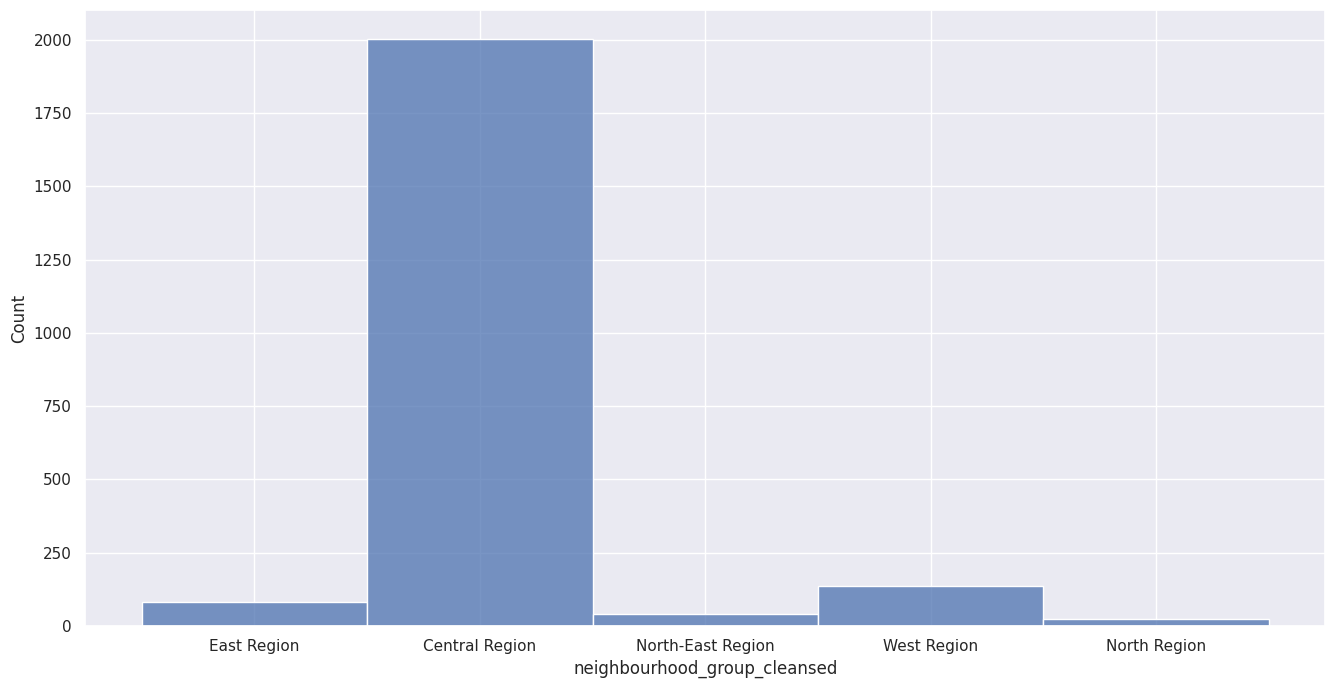

In [223]:
#Plot out a histogram to see the plots
f = plt.figure(figsize = (16,8))
sb.histplot(data = neighbourhoodGroupDF["neighbourhood_group_cleansed"])

#### We can see that there are many property listings in the central region as compared to the other regions like north east region or west region. This is probably due to the central region being closer as tourists attractions, so there is a higher amount of listings there. This can be seen in the map above as well.

---
### 4. property_type
**property_type** : Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field

In [224]:
propertyTypeDF = pd.DataFrame(airDF["property_type"])
propertyTypeDF

,property_type
0,Private room in villa
1,Private room in home
2,Private room in home
3,Private room in rental unit
4,Private room in rental unit
...,...
2279,Shared room in hostel
2280,Shared room in guesthouse
2281,Private room in hostel
2282,Room in hotel


In [225]:
propertyTypeDF.describe()

,property_type
count,2284
unique,40
top,Private room in rental unit
freq,401


<Axes: xlabel='property_type', ylabel='Count'>

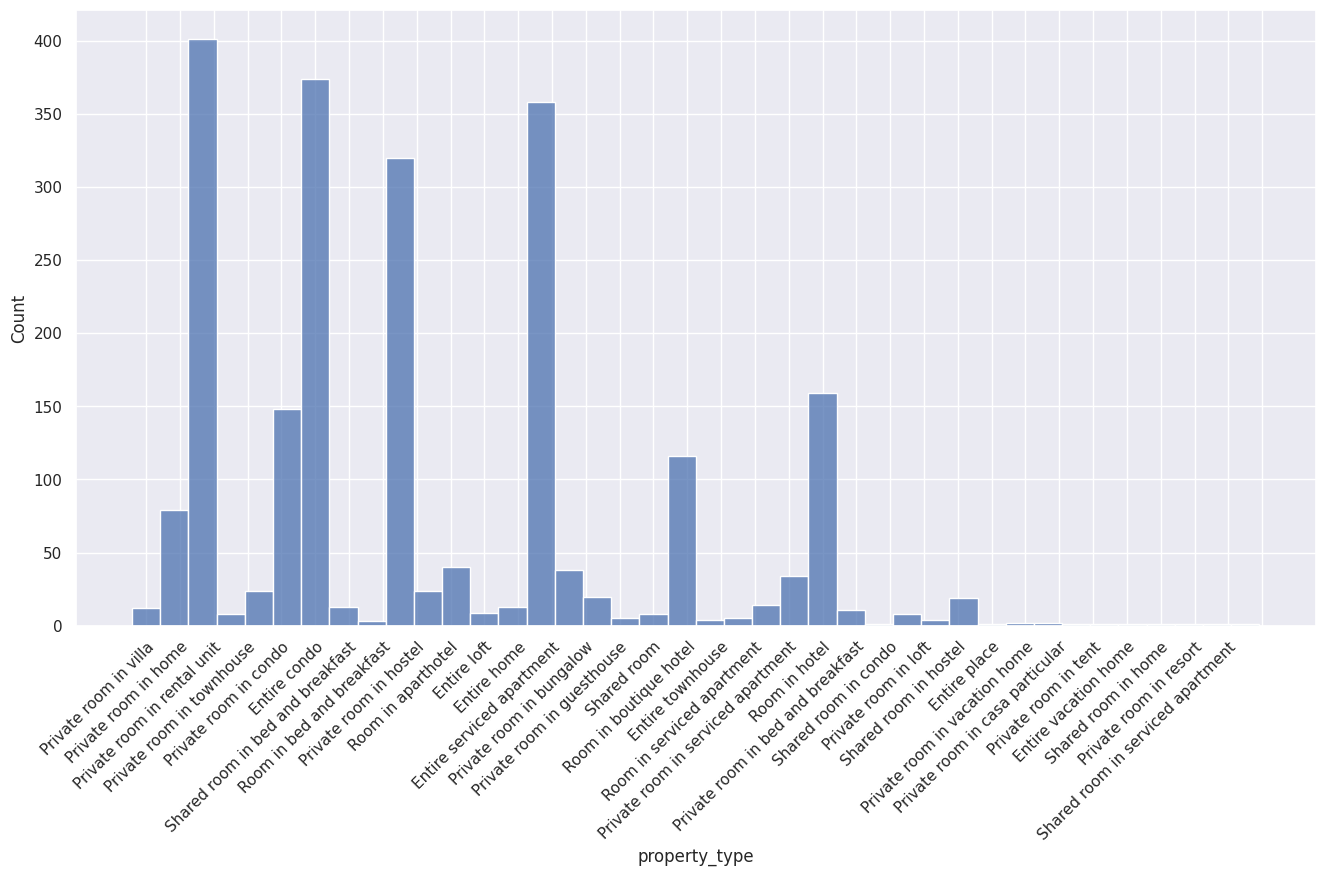

In [226]:
#Let us plot it to try to see and see if we can find any similarities
f = plt.figure(figsize = (16,8))
plt.xticks(np.arange(0, len(propertyTypeDF["property_type"].unique()), step=1.2))  # Set label locations.
plt.xticks(rotation = 45, ha = "right", rotation_mode = "anchor")
sb.histplot(data = propertyTypeDF["property_type"])

#### For property type, there are mainly three types, Private, Entire, Shared. The rest are either rooms in hostels or other niche categories. Let us group according to their categories to classify as one as we cannot work with so many different categories.

In [227]:
#Classify according to their first word up to the space
cleanedDF = pd.DataFrame(propertyTypeDF["property_type"])
count = 0
for x in cleanedDF["property_type"]:
    #Split this
    cleanedDF["property_type"].iloc[count] = cleanedDF["property_type"].iloc[count].split(" ", 1)[0]
    count += 1

cleanedDF

,property_type
0,Private
1,Private
2,Private
3,Private
4,Private
...,...
2279,Shared
2280,Shared
2281,Private
2282,Room


In [228]:
cleanedDF.value_counts()

property_type
Entire           1085
Private           777
Room              370
Shared             52
dtype: int64

<Axes: xlabel='property_type', ylabel='Count'>

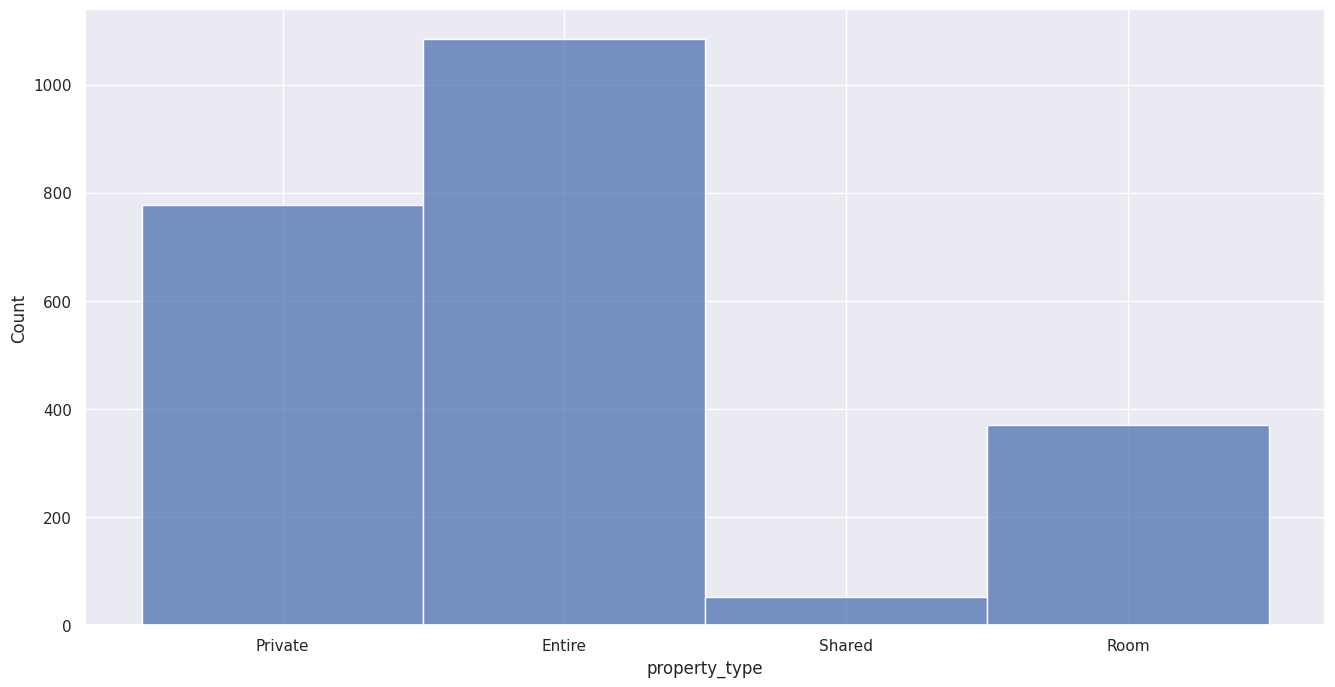

In [229]:
#Plot our updated df
f = plt.figure(figsize = (16,8))
sb.histplot(data = cleanedDF["property_type"])

#### This representation is easier to be classified as we just need the type of room, reducing it to 4 categories. We will see if the type has any effect on the listings price.

---
### 5. accommodates
**accommodates** : The maximum capacity of the listing

In [230]:
accomodateDF = pd.DataFrame(airDF["accommodates"])
accomodateDF

,accommodates
0,6
1,1
2,2
3,1
4,1
...,...
2279,1
2280,1
2281,4
2282,3


In [231]:
accomodateDF.describe()

,accommodates
count,2284.000000
mean,2.684326
std,1.806374
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,16.000000


<Axes: >

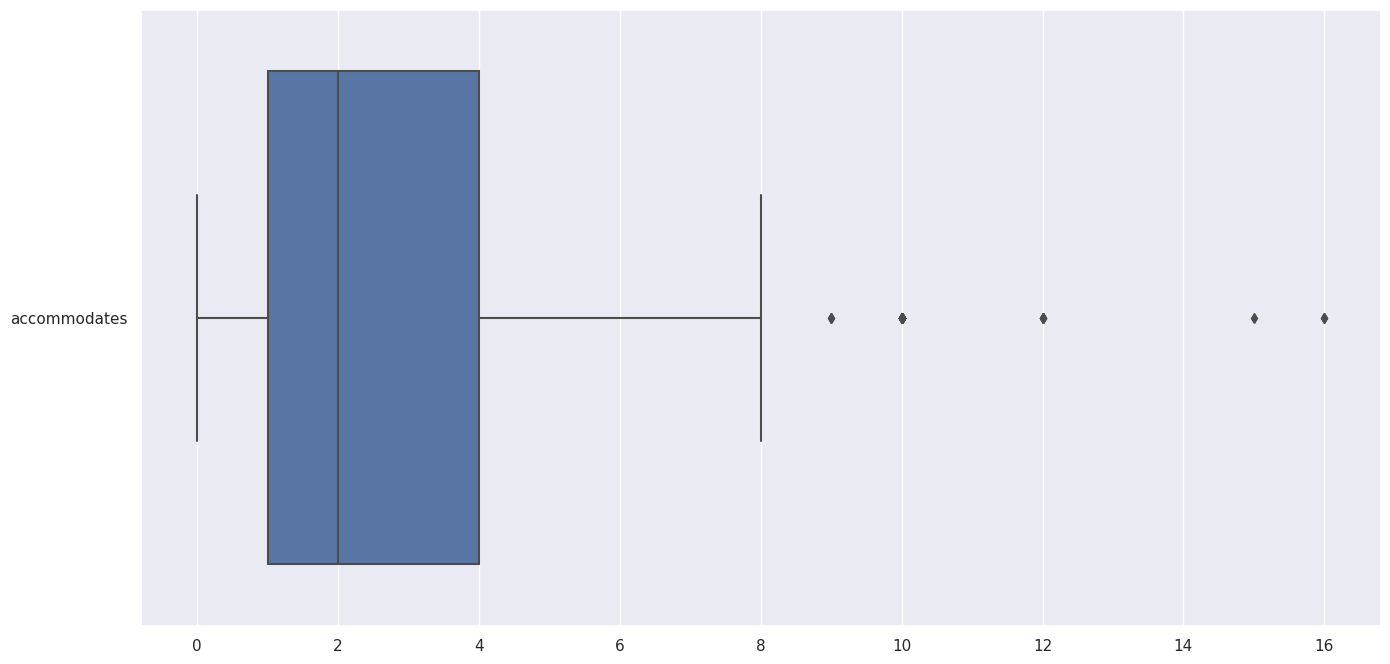

In [232]:
#Plot a boxplot first
f = plt.figure(figsize=(16,8))
sb.boxplot(data = accomodateDF, orient= 'h')

<Axes: ylabel='Count'>

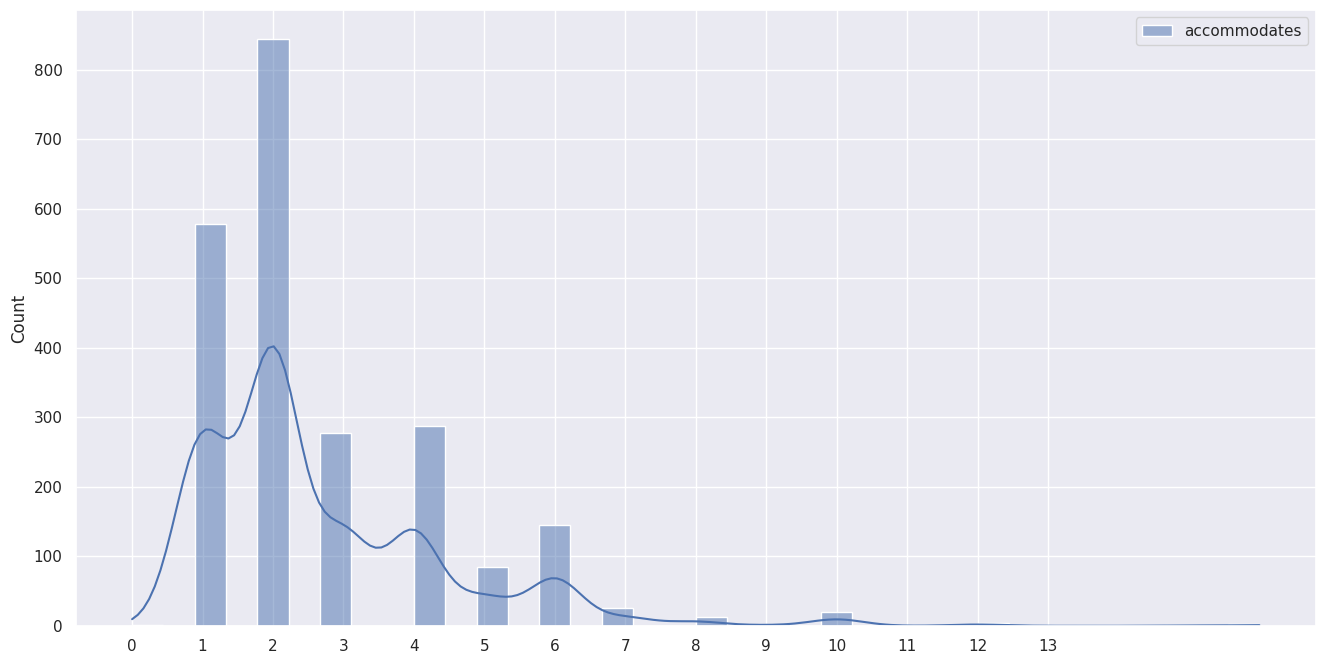

In [233]:
#Plot a histplot first
f = plt.figure(figsize=(16,8))
plt.xticks(np.arange(0, len(accomodateDF["accommodates"].unique()), step=1))  # Set label locations.
sb.histplot(data = accomodateDF, kde = True)

Let us try to remove outliers

In [234]:
accomodateDF = remove_outliers(accomodateDF, ["accommodates"])
accomodateDF

,accommodates
0,6
1,1
2,2
3,1
4,1
...,...
2279,1
2280,1
2281,4
2282,3


<Axes: >

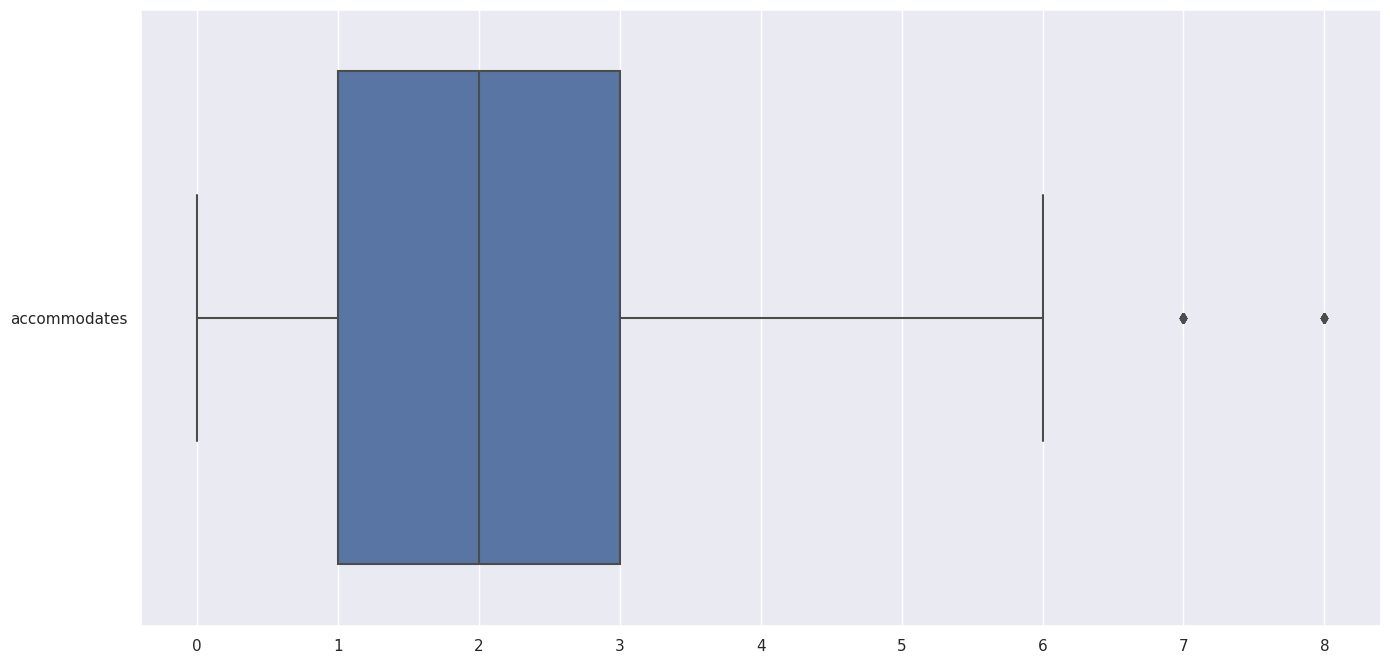

In [235]:
#Plot a boxplot first
f = plt.figure(figsize=(16,8))
sb.boxplot(data = accomodateDF, orient= 'h')

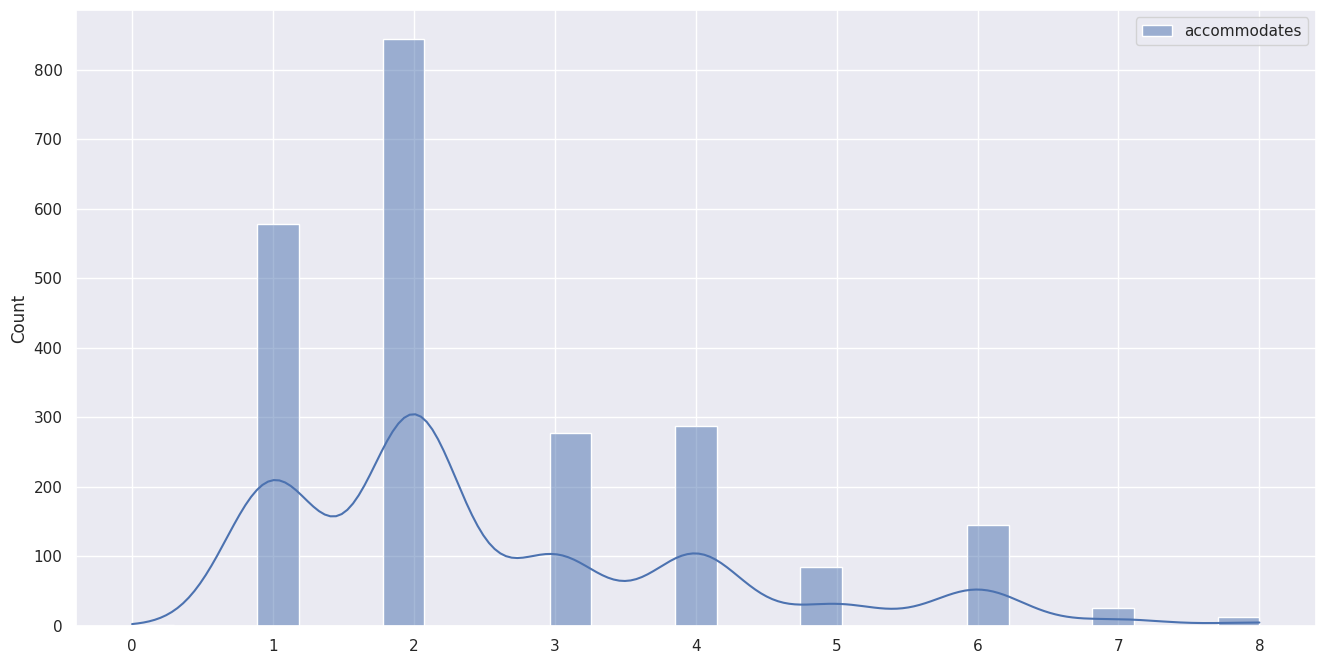

In [236]:
#Plot a histplot first
f = plt.figure(figsize=(16,8))
plt.xticks(np.arange(0, len(accomodateDF["accommodates"].unique()), step=1))  # Set label locations.
sb.histplot(data = accomodateDF, kde = True)
None

#### Generally, most listings have around 1-4 accomodates that can stay at a listing at a time.

---
### 6. amenities
**amenities** : The amenities in this hotel room

In [237]:
amenitiesDF = pd.DataFrame(airDF["amenities"])
amenitiesDF

,amenities
0,"[""Cooking basics"", ""Refrigerator"", ""Kitchen""..."
1,"[""Cooking basics"", ""Refrigerator"", ""Kitchen""..."
2,"[""Cooking basics"", ""Heating"", ""Kitchen"", ""H..."
3,"[""Air conditioning"", ""Shampoo"", ""Smoke alarm..."
4,"[""Air conditioning"", ""Shampoo"", ""Smoke alarm..."
...,...
2279,"[""Air conditioning"", ""Fire extinguisher"", ""S..."
2280,"[""Air conditioning"", ""Fire extinguisher"", ""S..."
2281,"[""Air conditioning"", ""Fire extinguisher"", ""S..."
2282,"[""First aid kit"", ""EV charger"", ""Heating"", ..."


In [238]:
amenitiesDF.describe()

,amenities
count,2284
unique,1730
top,"[""Cooking basics"", ""Heating"", ""Refrigerator""..."
freq,46


In [239]:
no_amenitiesDF = pd.DataFrame(airDF["no_amenities"])
no_amenitiesDF

,no_amenities
0,33
1,31
2,26
3,17
4,18
...,...
2279,8
2280,8
2281,8
2282,41


In [240]:
no_amenitiesDF.describe()

,no_amenities
count,2284.000000
mean,25.289405
std,10.860637
min,2.000000
25%,17.000000
50%,25.000000
75%,31.000000
max,67.000000


##### Perform analysis on the words appearing in amenities to see what is popular

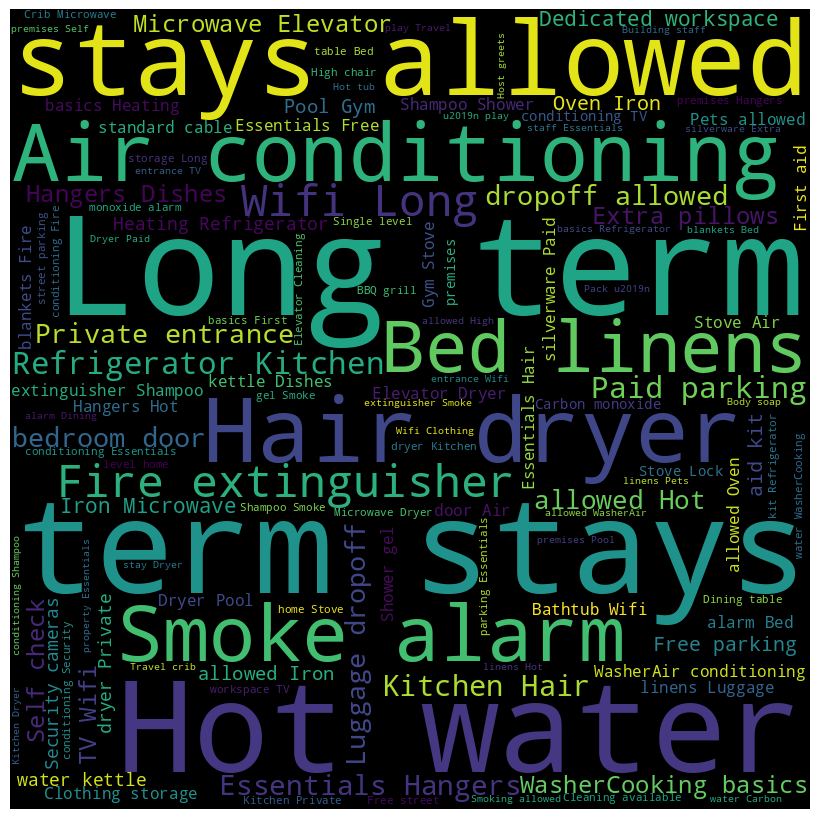

In [244]:
#Gather the neighbourhood overview DF
amenitiesText = "".join(amenitiesDF["amenities"].astype(str))

breaks = ["[","]",'"', "'",'\u2019s']
breaks2 = ['\u2013']

for x in breaks:    
    amenitiesText = amenitiesText.replace(x, "")
    
for x in breaks2:    
    amenitiesText = amenitiesText.replace(x, ",")

#Manually replace commas for space
amenitiesText = amenitiesText.replace(",", " ")

#Create wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      min_font_size=10).generate(amenitiesText)

#Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

---

# 2. Bivariate EDA